# Przygotowanie DANYCH projket ML

In [9]:
import pandas as pd
import os

df = pd.read_csv("insurance.csv")
df


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import warnings


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
print(df["children"].unique())
print(df["smoker"].unique())
print(df["sex"].unique())
print(df["region"].unique())
print(df["age"].unique())

[0 1 3 2 5 4]
['yes' 'no']
['female' 'male']
['southwest' 'southeast' 'northwest' 'northeast']
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


Text(0.5, 1.0, 'wielkosc potracen')

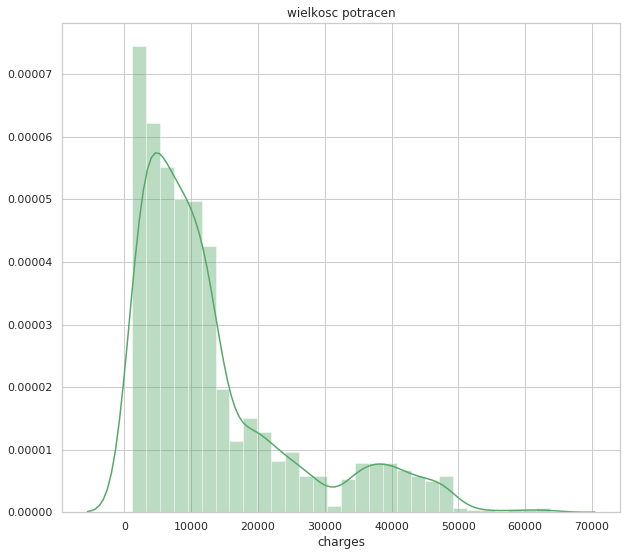

In [12]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(10, 9))
ax = sns.distplot(df['charges'], kde = True, color = 'g')
plt.title('wielkosc potracen')

Text(0.5, 1.0, 'wielkosc potracen w sklai logarytmicznej')

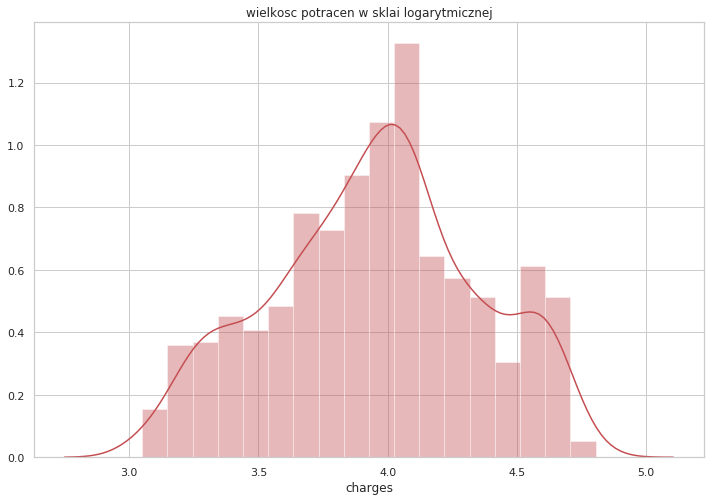

In [13]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

plt.title('wielkosc potracen w sklai logarytmicznej')

Wykonanie funkcji na każdym elemencie

`.apply` nawet z własnymi funkcjami i lambdami

Text(0.5, 1.0, 'wielkosc potracen w rozkladze na plex i region')

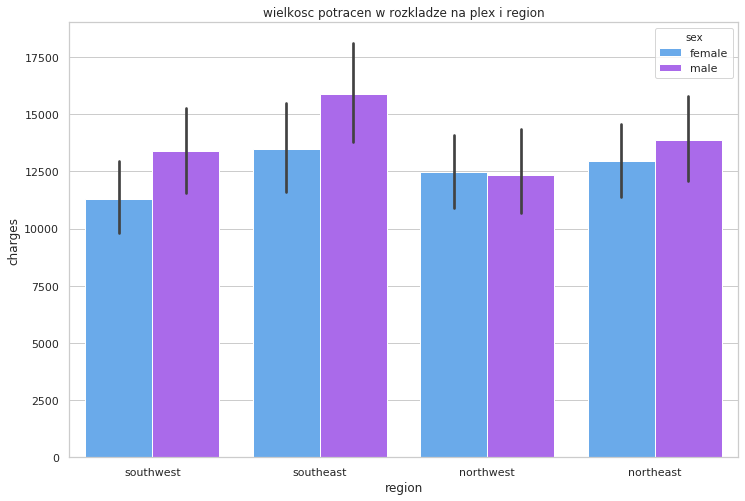

In [14]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')
plt.title('wielkosc potracen w rozkladze na plex i region')

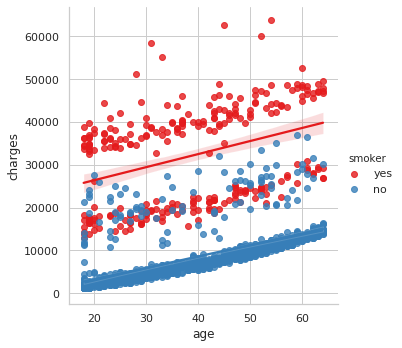

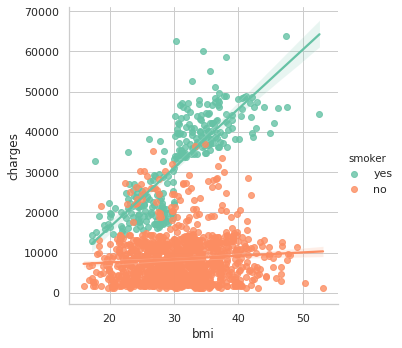

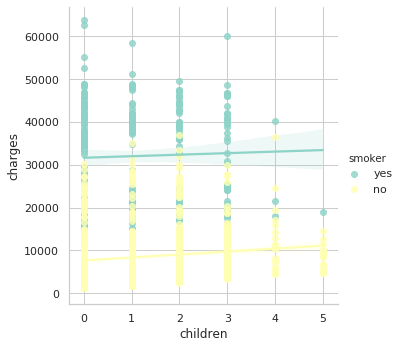

In [15]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

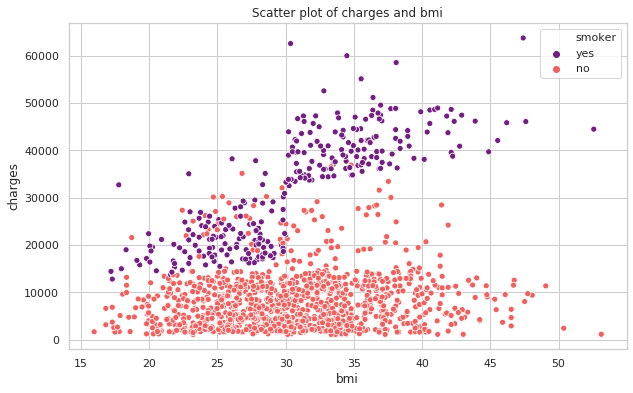

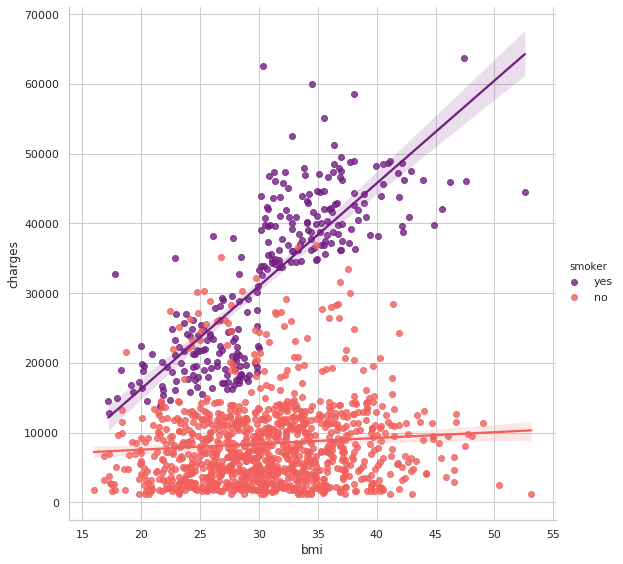

In [16]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', size = 8)

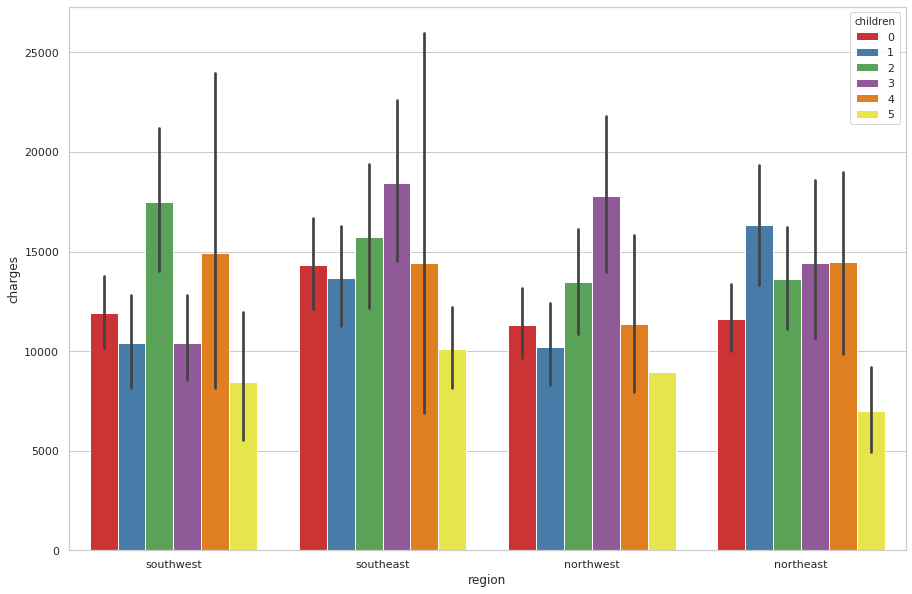

In [17]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

In [18]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [19]:
##Jak widać, nawet w wieku 18 lat palacze wydają dużo więcej na leczenie niż osoby niepalące. 
##Wśród niepalących widzimy „ogony”. mona przypuszczać, 
##że jest to spowodowane poważnymi chorobami lub wypadkami. 
##Zobaczmy teraz, jak koszt leczenia zależy od wieku palaczy i osób niepalących.

Text(0.5, 1, 'rozkad ze wzgledu na wiek  i palacz lub nie ')

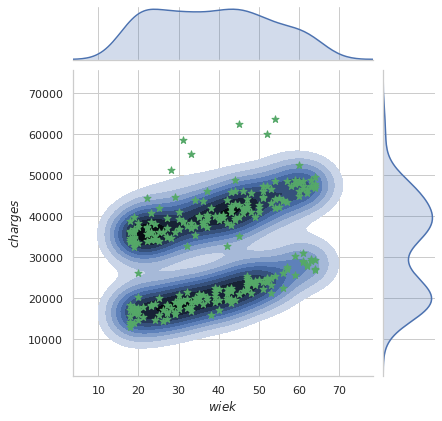

In [20]:
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 1)],kind="kde", color="b")
g.plot_joint(plt.scatter, c="g", s=55, linewidth=1, marker="*")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$wiek$", "$charges$")
ax.set_title('rozkad ze wzgledu na wiek  i palacz lub nie ')

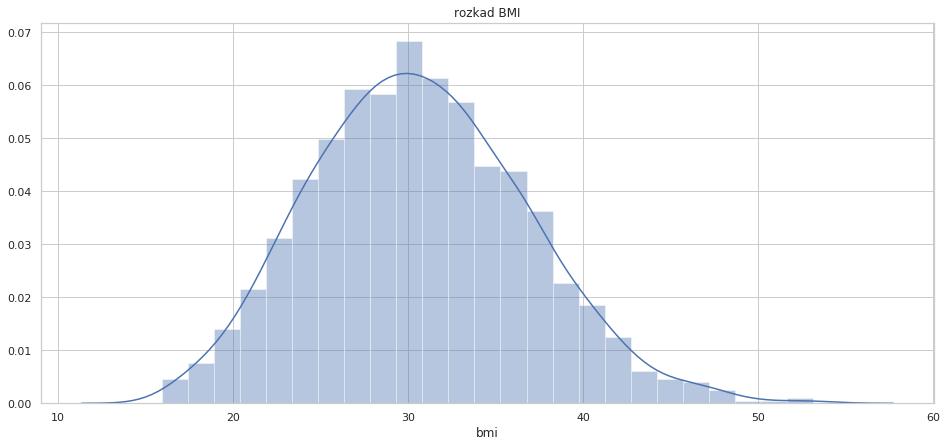

In [21]:
plt.figure(figsize=(16,7))
plt.title("rozkad BMI")
ax = sns.distplot(df["bmi"], color = 'b')

Text(0.5, 1, 'Palacze i nie palacze ktorzy posadaja dzieci')

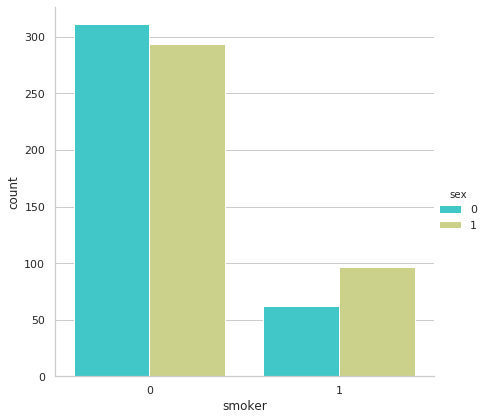

In [22]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=df[(df.children > 0)], size = 6)
ax.set_title('Palacze i nie palacze ktorzy posadaja dzieci')

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split





x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
regresja_liniowa = LinearRegression().fit(x_train,y_train)

y_train_pred = regresja_liniowa.predict(x_train)
y_test_pred = regresja_liniowa.predict(x_test)

print(regresja_liniowa.score(x_test,y_test))

0.7962732059725786
